In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
from matplotlib.lines import Line2D
import scipy.stats
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns", None)
from IPython.display import HTML
import datetime as dt

In [104]:
df = pd.read_csv("RPT_8430_FinalData_with_OriginalData.csv")

In [105]:
pd.set_option("display.max_columns", None)
df = df.rename(columns={"Sample ID": "SampleID"})
df.head(5)

,SampleUId,Channel,index,TestGuid,ReplicateNumber,SampleID,SampleType,SampleSpecimenType,TestSpecimenType,SpecimenTubeType,AssayName,ResultCode,AssayVersion,RpVersion,TargetName,ProcessingStep,ChannelSummarySetId,LocalizedResult,Ct,EndPointFluorescence,MaxPeakHeight,EPR,LogConc,Conc,BaselineFirstCycle,BaselineLastCycle,BaselineYIntercept,ReadingsSetId,Readings1,Readings2,Readings3,Readings4,Readings5,Readings6,Readings7,Readings8,Readings9,Readings10,Readings11,Readings12,Readings13,Readings14,Readings15,Readings16,Readings17,Readings18,Readings19,Readings20,Readings21,Readings22,Readings23,Readings24,Readings25,Readings26,Readings27,Readings28,Readings29,Readings30,Readings31,Readings32,Readings33,Readings34,Readings35,Readings36,Readings37,Readings38,Readings39,Readings40,Readings41,Readings42,Readings43,Readings44,Readings45,Readings46,Readings47,Readings48,Readings49,Readings50,Readings51,Readings52,Readings53,Readings54,Readings55,Readings56,Readings57,Readings58,Readings59,Readings60,Readings61,Readings62,Readings63,Readings64,Readings65,Readings66,Readings67,Readings68,Readings69,Readings70,Readings71,Readings72,Readings73,Readings74,Readings75,Readings76,Readings77,Readings78,Readings79,Readings80,Readings81,Readings82,Readings83,Readings84,Readings85,Readings86,Readings87,Readings88,Readings89,Readings90,Readings91,Readings92,Readings93,Readings94,Readings95,Readings96,Readings97,Readings98,Readings99,Readings100,NeuMoDxSystemUId,NeuMoDxSystemId,N500SerialNumber,NeuMoDxSoftwareVersion,HamiltonSerialNumber,HamiltonFirmwareVersion,HamiltonMethodVersion,HamiltonSoftwareVersion,HeaterModuleUId,HeaterModuleId,HeaterModuleSerial,HeaterFirmware,HeaterModuleIndex,CapturePlateWell,PcrModuleUId,PcrModuleId,PcrModuleSerial,ABFirmwareVersion,PcrFirmwareVersion,PcrFirmwareVersion.1,PCRModuleIndex,PcrCartridgeLane,TestStripNeuMoDxCarrier,TestStripNeuMoDxCarrierPosition,TestStripNeuMoDxWell,TestStripLDTMasterMixCarrier,TestStripLDTMasterMixCarrierPosition,TestStripLDTMasterMixWell,TestStripLDTPrimerProbeCarrier,TestStripLDTPrimerCarrierPosition,TestStripLDTPrimerProbeWell,TestOperator,RunType,Status,SampleOrigin,Start Date/Time,LHPAStartDateTime,LHPBStartDateTime,LHPCStartDateTime,PCRStartDateTime,EndDateTime,SampleTubeRack,SampleTubePosition,BulkReagentDrawer,LHPAADPPosition,LHPCADPPosition,BufferLargeTipRackBarcode,BufferLargeTipPosition,SampleLargeTipRackBarcode,SampleLargeTipPosition,SmallTipRackBarcode,FilterLargeTipRackBarcode,FilterLargeTipPosition,CartridgeId,CartridgeLot,CartridgeSerial,CartridgeExpirationDate,BufferTroughId,BufferTroughLot,BufferTroughSerial,BufferTroughExpirationDate,ExtractionPlateId,ExtractionPlateLot,ExtractionPlateSerial,ExtractionPlateExpirationDate,TestStripId,TestStripLot,TestStripSerial,TestStripExpirationDate,ReleaseReagentId,ReleaseReagentLot,ReleaseReagentSerial,ReleaseReagentExpirationDate,WashReagentId,WashReagentLot,WashReagentSerial,WashReagentExpirationDate,LDTTestStripMMId,LDTTestStripMMLot,LDTTestStripMMSerial,LDTTestStripMMExpirationDate,LDTTestStripPPMId,LDTTestStripPPMLot,LDTTestStripPPMSerial,LDTTestStripPPMExpirationDate,Original Test Guid,Original Localized Result,Original Ct,Original End Point Fluorescence,Original Max Peak Height,Original EPR,Original Baseline First Cycle,Original Baseline Last Cycle,Original Baseline Slope,Original Software Version,Original Assay Version,Original N500 Serial Number,Original PCR Module Serial,Original Pcr Cartridge Lane,Original Pcr Cartridge Barcode,Original Capture Plate Lot,Original Buffer Lot,Original Test Strip NeuMoDx Lot,Original Pcr Cartridge Lot,Original Release Reagent Lot,Original Wash Reagent Lot,Original Capture Plate Serial,Original Buffer Serial,Original Test Strip NeuMoDx Serial,Original Pcr Cartridge Serial,Original Release Reagent Serial,Original Wash Reagent Serial
0,000C9A77-4900-45B3-865A-003B46E81BD9,Green_470_510,140,41e98807-b689-ec11-8581-54bf64648d5d,1,HPV18v11,Patient Sample,Cytology,Cytology,SecondaryTube13x75,HPV,HPV,

In [106]:
dfm = df.copy()

In [107]:
dfm = dfm[dfm.ProcessingStep == "Normalized"]
dfm = dfm[dfm.Channel == "Yellow_530_555"]


dfm = dfm[(dfm.SampleID.str[:6] == "HPVneg") |
          (dfm.SampleID.str[:5] == "Bglob") |
          (dfm.SampleID.str[:3] == "Neg") |
          (dfm.SampleID.str[:3] == "ZAS") |
          (dfm.SampleID.str[:2] == "NC") |
          (dfm.SampleID.str[:5] == "HPV16") |
          (dfm.SampleID.str[:5] == "SiHav") |
          (dfm.SampleID.str[:5] == "HeLav") |
          (dfm.SampleID.str[:4] == "A549") |
          (dfm.SampleID.str[:4] == "16hv") |
          (dfm.SampleID.str[:4] == "Sure") |
          (dfm.SampleID.str[:5] == "37Neg") |
          (dfm.SampleID.str[:5] == "HPV18") ]

total = dfm.shape[0]


dfm.filter(items= ["SampleUId","SampleID","ResultCode",
                    "AssayVersion","Channel","LocalizedResult",
                    "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
                    'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])
print('Total_presumed_negatives')
print(dfm.shape[0])
#print("{0:.2%}".format(dfm.shape[0]/total))


dffp = dfm[dfm.LocalizedResult == "TargetAmplified"]
print('Number_of_False_Positives')
print(dffp.shape[0])
print('False_Positives_Rate')
print("{0:.2%}".format(dffp.shape[0]/total))
dfm = df.copy()

Total_presumed_negatives
1494
Number_of_False_Positives
28
False_Positives_Rate
1.87%


In [108]:
dfc = dfm.copy()

In [109]:
dfc = dfc[dfc.ProcessingStep == "Normalized"]
dfc = dfc[dfc.Channel == "Yellow_530_555"]
dfc = dfc[(dfc.SampleID.str[:6] == "HPVneg") |
          (dfc.SampleID.str[:5] == "Bglob") |
          (dfc.SampleID.str[:3] == "Neg") |
          (dfc.SampleID.str[:3] == "ZAS") |
          (dfc.SampleID.str[:2] == "NC") |
          (dfc.SampleID.str[:5] == "HPV16") |
          (dfc.SampleID.str[:5] == "SiHav") |
          (dfc.SampleID.str[:5] == "HeLav") |
          (dfc.SampleID.str[:4] == "16hv") |
          (dfc.SampleID.str[:4] == "Sure") |
          (dfc.SampleID.str[:5] == "37Neg") |
          (dfc.SampleID.str[:4] == "A549") |
          (dfc.SampleID.str[:5] == "HPV18") ]
conditions = [
    (dfc['BaselineFirstCycle'] == 10.0) & (dfc['BaselineLastCycle'] == 16.0),
    (dfc['BaselineFirstCycle'] == 10.0) & (dfc['BaselineLastCycle'] == 10.0),
    (dfc['BaselineFirstCycle'] != 10.0) & (dfc['MaxPeakHeight'] > 0),
    (dfc['BaselineFirstCycle'] != 10.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Fixed_Baseline_Sample', 'Single_Point_Normalized_Sample', 'Weak_Amplification_Samples', 'Unassigned']

# create a new column and use np.select to assign values to it using our lists as arguments
dfc['Condition'] = np.select(conditions, values)

# dfc = dfc.filter(items= ["SampleUId","Condition",'BaselineFirstCycle','BaselineLastCycle',"SampleID","ResultCode",
#                     "AssayVersion","Channel","LocalizedResult",
#                     "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
#                     'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])

# display updated DataFrame



In [110]:
dfc['Start Date/Time'] = pd.to_datetime(df['Start Date/Time'], errors= 'coerce')
dfc['Year'] = dfc['Start Date/Time'].dt.year
dfc.head(3)


,SampleUId,Channel,index,TestGuid,ReplicateNumber,SampleID,SampleType,SampleSpecimenType,TestSpecimenType,SpecimenTubeType,AssayName,ResultCode,AssayVersion,RpVersion,TargetName,ProcessingStep,ChannelSummarySetId,LocalizedResult,Ct,EndPointFluorescence,MaxPeakHeight,EPR,LogConc,Conc,BaselineFirstCycle,BaselineLastCycle,BaselineYIntercept,ReadingsSetId,Readings1,Readings2,Readings3,Readings4,Readings5,Readings6,Readings7,Readings8,Readings9,Readings10,Readings11,Readings12,Readings13,Readings14,Readings15,Readings16,Readings17,Readings18,Readings19,Readings20,Readings21,Readings22,Readings23,Readings24,Readings25,Readings26,Readings27,Readings28,Readings29,Readings30,Readings31,Readings32,Readings33,Readings34,Readings35,Readings36,Readings37,Readings38,Readings39,Readings40,Readings41,Readings42,Readings43,Readings44,Readings45,Readings46,Readings47,Readings48,Readings49,Readings50,Readings51,Readings52,Readings53,Readings54,Readings55,Readings56,Readings57,Readings58,Readings59,Readings60,Readings61,Readings62,Readings63,Readings64,Readings65,Readings66,Readings67,Readings68,Readings69,Readings70,Readings71,Readings72,Readings73,Readings74,Readings75,Readings76,Readings77,Readings78,Readings79,Readings80,Readings81,Readings82,Readings83,Readings84,Readings85,Readings86,Readings87,Readings88,Readings89,Readings90,Readings91,Readings92,Readings93,Readings94,Readings95,Readings96,Readings97,Readings98,Readings99,Readings100,NeuMoDxSystemUId,NeuMoDxSystemId,N500SerialNumber,NeuMoDxSoftwareVersion,HamiltonSerialNumber,HamiltonFirmwareVersion,HamiltonMethodVersion,HamiltonSoftwareVersion,HeaterModuleUId,HeaterModuleId,HeaterModuleSerial,HeaterFirmware,HeaterModuleIndex,CapturePlateWell,PcrModuleUId,PcrModuleId,PcrModuleSerial,ABFirmwareVersion,PcrFirmwareVersion,PcrFirmwareVersion.1,PCRModuleIndex,PcrCartridgeLane,TestStripNeuMoDxCarrier,TestStripNeuMoDxCarrierPosition,TestStripNeuMoDxWell,TestStripLDTMasterMixCarrier,TestStripLDTMasterMixCarrierPosition,TestStripLDTMasterMixWell,TestStripLDTPrimerProbeCarrier,TestStripLDTPrimerCarrierPosition,TestStripLDTPrimerProbeWell,TestOperator,RunType,Status,SampleOrigin,Start Date/Time,LHPAStartDateTime,LHPBStartDateTime,LHPCStartDateTime,PCRStartDateTime,EndDateTime,SampleTubeRack,SampleTubePosition,BulkReagentDrawer,LHPAADPPosition,LHPCADPPosition,BufferLargeTipRackBarcode,BufferLargeTipPosition,SampleLargeTipRackBarcode,SampleLargeTipPosition,SmallTipRackBarcode,FilterLargeTipRackBarcode,FilterLargeTipPosition,CartridgeId,CartridgeLot,CartridgeSerial,CartridgeExpirationDate,BufferTroughId,BufferTroughLot,BufferTroughSerial,BufferTroughExpirationDate,ExtractionPlateId,ExtractionPlateLot,ExtractionPlateSerial,ExtractionPlateExpirationDate,TestStripId,TestStripLot,TestStripSerial,TestStripExpirationDate,ReleaseReagentId,ReleaseReagentLot,ReleaseReagentSerial,ReleaseReagentExpirationDate,WashReagentId,WashReagentLot,WashReagentSerial,WashReagentExpirationDate,LDTTestStripMMId,LDTTestStripMMLot,LDTTestStripMMSerial,LDTTestStripMMExpirationDate,LDTTestStripPPMId,LDTTestStripPPMLot,LDTTestStripPPMSerial,LDTTestStripPPMExpirationDate,Original Test Guid,Original Localized Result,Original Ct,Original End Point Fluorescence,Original Max Peak Height,Original EPR,Original Baseline First Cycle,Original Baseline Last Cycle,Original Baseline Slope,Original Software Version,Original Assay Version,Original N500 Serial Number,Original PCR Module Serial,Original Pcr Cartridge Lane,Original Pcr Cartridge Barcode,Original Capture Plate Lot,Original Buffer Lot,Original Test Strip NeuMoDx Lot,Original Pcr Cartridge Lot,Original Release Reagent Lot,Original Wash Reagent Lot,Original Capture Plate Serial,Original Buffer Serial,Original Test Strip NeuMoDx Serial,Original Pcr Cartridge Serial,Original Release Reagent Serial,Original Wash Reagent Serial,Condition,Year
15,000C9A77-4900-45B3-865A-003B46E81BD9,Yellow_530_555,131,41e98807-b689-ec11-8581-54bf64648d5d,1,HPV18v11,Patient Sample,Cytology,Cytology,SecondaryT

In [111]:
# dfmod = dfc.set_index(['Original PCR Module Serial'])
# l = dfmod.index.unique(0).tolist()

# for mod in l:
#     print(str(mod) + " " + str(dfc[dfc['Original PCR Module Serial'] == mod].shape[0]))

# dfts = dfc.set_index(['Original Test Strip NeuMoDx Lot'])
# ts = dfts.index.unique(0).tolist()

# for t in ts:
#     print(str(t) + " " + str(dfc[dfc['Original Test Strip NeuMoDx Lot'] == t].shape[0]))

# dfcr = dfc.set_index(['Original Pcr Cartridge Lot'])
# cr = dfcr.index.unique(0).tolist()

# for c in cr:
#     print(str(c) + " " + str(dfc[dfc['Original Pcr Cartridge Lot'] == c].shape[0]))

# dfgu = dfc.set_index(['Original Software Version'])
# gu = dfgu.index.unique(0).tolist()

# for g in gu:
#     print(str(g) + " " + str(dfc[dfc['Original Software Version'] == g].shape[0]))

dfdt = dfc.set_index(['Year'])
dt = dfdt.index.unique(0).tolist()

for y in dt:
    print(str(y) + " " + str(dfc[dfc['Year'] == y].shape[0]))


2020 962
2021 331
2022 201


In [112]:
dfw = dfc[dfc.Condition == 'Weak_Amplification_Samples']
# dfw = dfw.filter(items= ["SampleUId","Condition",'BaselineFirstCycle','BaselineLastCycle',"SampleID","ResultCode",
#                     "AssayVersion","Channel","LocalizedResult",
#                     "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
#                     'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])
print('Total_Weak_Amplification_Samples')
print(dfw.shape[0])

dfwfp = dfw[dfw.LocalizedResult == "TargetAmplified"]
print('Number_of_False_Positives_in_Weak_Amplification_Samples')
print(dfwfp.shape[0])
print('False_Positives_Rate_in_Weak_Amplification_Samples')
print("{0:.2%}".format(dfwfp.shape[0]/dfw.shape[0]))

Total_Weak_Amplification_Samples
87
Number_of_False_Positives_in_Weak_Amplification_Samples
27
False_Positives_Rate_in_Weak_Amplification_Samples
31.03%


In [113]:
# for mod in l:
#     print(str(mod) + " " + str(dfw[dfw['Original PCR Module Serial'] == mod].shape[0]))

# for t in ts:
#     print(str(t) + " " + str(dfw[dfw['Original Test Strip NeuMoDx Lot'] == t].shape[0]))

# for c in cr:
#     print(str(c) + " " + str(dfw[dfw['Original Pcr Cartridge Lot'] == c].shape[0]))

# for g in gu:
#     print(str(g) + " " + str(dfw[dfw['Original Software Version'] == g].shape[0]))

for y in dt:
    print(str(y) + " " + str(dfw[dfw['Year'] == y].shape[0]))


2020 63
2021 17
2022 7


In [114]:
dff = dfc[dfc.Condition == 'Fixed_Baseline_Sample']
# dff = dff.filter(items= ["SampleUId","Condition",'BaselineFirstCycle','BaselineLastCycle',"SampleID","ResultCode",
#                     "AssayVersion","Channel","LocalizedResult",
#                     "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
#                     'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])


print('Total_Fixed_Baseline_Samples')
print(dff.shape[0])
dfffp = dff[dff.LocalizedResult == "TargetAmplified"]
print('Number_of_False_Positives_in_Fixed_Baseline_Samples')
print(dfffp.shape[0])
print('False_Positives_Rate_in_Fixed_Baseline_Samples')
print("{0:.2%}".format(dfffp.shape[0]/dff.shape[0]))


Total_Fixed_Baseline_Samples
26
Number_of_False_Positives_in_Fixed_Baseline_Samples
0
False_Positives_Rate_in_Fixed_Baseline_Samples
0.00%


In [125]:
# for mod in l:
#     print(str(mod) + " " + str(dff[dff['Original PCR Module Serial'] == mod].shape[0]))

# for t in ts:
#     print(str(t) + " " + str(dff[dff['Original Test Strip NeuMoDx Lot'] == t].shape[0]))

# for c in cr:
#     print(str(c) + " " + str(dff[dff['Original Pcr Cartridge Lot'] == c].shape[0]))

# for g in gu:
#     print(str(g) + " " + str(dff[dff['Original Software Version'] == g].shape[0]))

for y in dt:
    print(str(y) + " " + str(dff[dff['Year'] == y].shape[0]))

2020 19
2021 4
2022 3


In [116]:
dfs = dfc[dfc.Condition == 'Single_Point_Normalized_Sample']
# dfs = dfs.filter(items= ["SampleUId","Condition",'BaselineFirstCycle','BaselineLastCycle',"SampleID","ResultCode",
#                     "AssayVersion","Channel","LocalizedResult",
#                     "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
#                     'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])
print('Total_Single_Point_Normalized_Samples')
print(dfs.shape[0])
dfsfp = dfs[dfs.LocalizedResult == "TargetAmplified"]
print('Number_of_False_Positives_in_Single_Point_Normalized_Samples')
print(dfsfp.shape[0])
print('False_Positives_Rate_in_Single_Point_Normalized_Samples')
print("{0:.2%}".format(dfsfp.shape[0]/dfs.shape[0]))

Total_Single_Point_Normalized_Samples
6
Number_of_False_Positives_in_Single_Point_Normalized_Samples
1
False_Positives_Rate_in_Single_Point_Normalized_Samples
16.67%


In [126]:
# for mod in l:
#     print(str(mod) + " " + str(dfs[dfs['Original PCR Module Serial'] == mod].shape[0]))

# for t in ts:
#     print(str(t) + " " + str(dfs[dfs['Original Test Strip NeuMoDx Lot'] == t].shape[0]))

# for c in cr:
#     print(str(c) + " " + str(dfs[dfs['Original Pcr Cartridge Lot'] == c].shape[0]))

# for g in gu:
#     print(str(g) + " " + str(dfs[dfs['Original Software Version'] == g].shape[0]))

for y in dt:
    print(str(y) + " " + str(dfs[dfs['Year'] == y].shape[0]))

2020 0
2021 0
2022 6


In [118]:
dfa = dfc[dfc.Condition == 'Unassigned']
# dfa = dfa.filter(items= ["SampleUId","Condition",'BaselineFirstCycle','BaselineLastCycle',"SampleID","ResultCode",
#                     "AssayVersion","Channel","LocalizedResult",
#                     "Ct","EndPointFluorescence","MaxPeakHeight","EPR",
#                     'N500SerialNumber','NeuMoDxSoftwareVersion','PcrModuleSerial'])
print('Total_Unassigned')
print(dfa.shape[0])
dfafp = dfa[dfa.LocalizedResult == "TargetAmplified"]
print('Number_of_False_Positives_in_Unassigned')
print(dfafp.shape[0])
print('False_Positives_Rate_in_Unassigned')
print("{0:.2%}".format(dfafp.shape[0]/dfa.shape[0]))

Total_Unassigned
1375
Number_of_False_Positives_in_Unassigned
0
False_Positives_Rate_in_Unassigned
0.00%


In [119]:

fp_summary = pd.DataFrame({'Fixed_Baseline_Sample': [dfffp.shape[0], "{0:.2%}".format(dfffp.shape[0]/dff.shape[0]), dff.shape[0]], 
                           'Single_Point_Normalized_Sample': [dfsfp.shape[0], "{0:.2%}".format(dfsfp.shape[0]/dfs.shape[0]), dfs.shape[0]],
                           'Weak_Amplification_Samples': [dfwfp.shape[0], "{0:.2%}".format(dfwfp.shape[0]/dfw.shape[0]), dfw.shape[0]],
                           'Unassigned': [dfafp.shape[0], "{0:.2%}".format(dfafp.shape[0]/dfa.shape[0]), dfa.shape[0]],
                           'Total': ["{0:.2%}".format(dffp.shape[0]/total), dffp.shape[0], total]},
                            index=['Number_of_False_Positvie', 'Rate_of_False_Positvie', 'Total'])




fp_summary

,Fixed_Baseline_Sample,Single_Point_Normalized_Sample,Weak_Amplification_Samples,Unassigned,Total
Number_of_False_Positvie,0,1,27,0,1.87%
Rate_of_False_Positvie,0.00%,16.67%,31.03%,0.00%,28
Total,26,6,87,1375,1494


In [120]:
y = ['Readings'+str(read) for read in range(1,81,1)]
y.append("SampleUId")


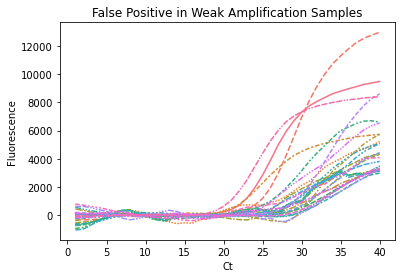

In [121]:
dfpl = dfwfp.copy()

dfpl = dfpl[y]

dfpl_tr = dfpl.transpose()
dfpl_tr.columns = dfpl_tr.iloc[dfpl_tr.shape[0]-1]

lst = [i for i in range(1,dfpl_tr.shape[0])]

dfpl_tr= dfpl_tr.drop(["SampleUId"])
dfpl_tr = dfpl_tr.set_axis(lst)


if dfpl_tr.shape[1]>0:
    plt = sns.lineplot(data = dfpl_tr,legend = False,)
    plt.set(title='False Positive in Weak Amplification Samples', xlabel = "Ct", ylabel = "Fluorescence")



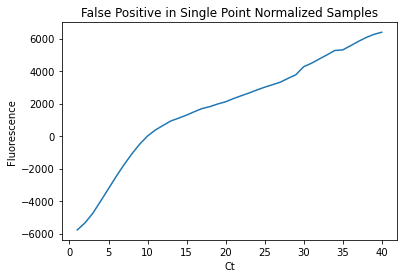

In [122]:
dfpl = dfsfp.copy()

dfpl = dfpl[y]

dfpl_tr = dfpl.transpose()
dfpl_tr.columns = dfpl_tr.iloc[dfpl_tr.shape[0]-1]

lst = [i for i in range(1,dfpl_tr.shape[0])]

dfpl_tr= dfpl_tr.drop(["SampleUId"])
dfpl_tr = dfpl_tr.set_axis(lst)

if dfpl_tr.shape[1]>0:
    plt = sns.lineplot(data = dfpl_tr,legend = False,)
    plt.set(title='False Positive in Single Point Normalized Samples',xlabel = "Ct", ylabel = "Fluorescence")


In [123]:
dfpl = dfffp.copy()

dfpl = dfpl[y]

dfpl_tr = dfpl.transpose()
dfpl_tr.columns = dfpl_tr.iloc[dfpl_tr.shape[0]-1]

lst = [i for i in range(1,dfpl_tr.shape[0])]

dfpl_tr= dfpl_tr.drop(["SampleUId"])
dfpl_tr = dfpl_tr.set_axis(lst)

if dfpl_tr.shape[1]>0:
    plt = sns.lineplot(data = dfpl_tr,legend = False,)
    plt.set(title='False Positive in Fixed Baseline Samples',xlabel = "Ct", ylabel = "Fluorescence")

In [124]:
dfpl = dfafp.copy()

dfpl = dfpl[y]

dfpl_tr = dfpl.transpose()
dfpl_tr.columns = dfpl_tr.iloc[dfpl_tr.shape[0]-1]
#dfpl_tr = dfpl_tr.dropna()
lst = [i for i in range(1,dfpl_tr.shape[0])]

dfpl_tr= dfpl_tr.drop(["SampleUId"])
dfpl_tr = dfpl_tr.set_axis(lst)

if dfpl_tr.shape[1]>0:
    plt = sns.lineplot(data = dfpl_tr,legend = False,)
    plt.set(title='False Positive in Unassigned Samples',xlabel = "Ct", ylabel = "Fluorescence")